<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [2]:
data = pd.read_csv('./train.csv')
X_test = pd.read_csv('./test.csv')

In [3]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [4]:
data.shape

(5282, 20)

In [5]:
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

In [6]:
data.sample(5, random_state=0)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4650,66,20.35,1359.5,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,0
29,25,89.70,2187.55,Female,1,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,1
1688,36,76.35,2606.35,Female,0,No,No,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,No,One year,Yes,Mailed check,0
2946,20,19.60,356.15,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),0
4865,13,98.00,1237.85,Male,1,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1


In [7]:
print(f"Duplicated rows: {data.duplicated(keep=False).sum()}")
print(f"Duplicated rows without target: {data.drop(target_col, axis=1).duplicated(keep=False).sum()}")

Duplicated rows: 28
Duplicated rows without target: 41


In [8]:
data[data.drop(target_col, axis=1).duplicated(keep=False)].sort_values(by=[*data.columns])

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
838,1,19.65,19.65,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1636,1,19.65,19.65,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
4811,1,19.65,19.65,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
3463,1,19.75,19.75,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
4294,1,19.75,19.75,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
3831,1,20.00,20,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1647,1,20.00,20,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
594,1,20.05,20.05,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1474,1,20.05,20.05,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
3735,1,20.20,20.2,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0


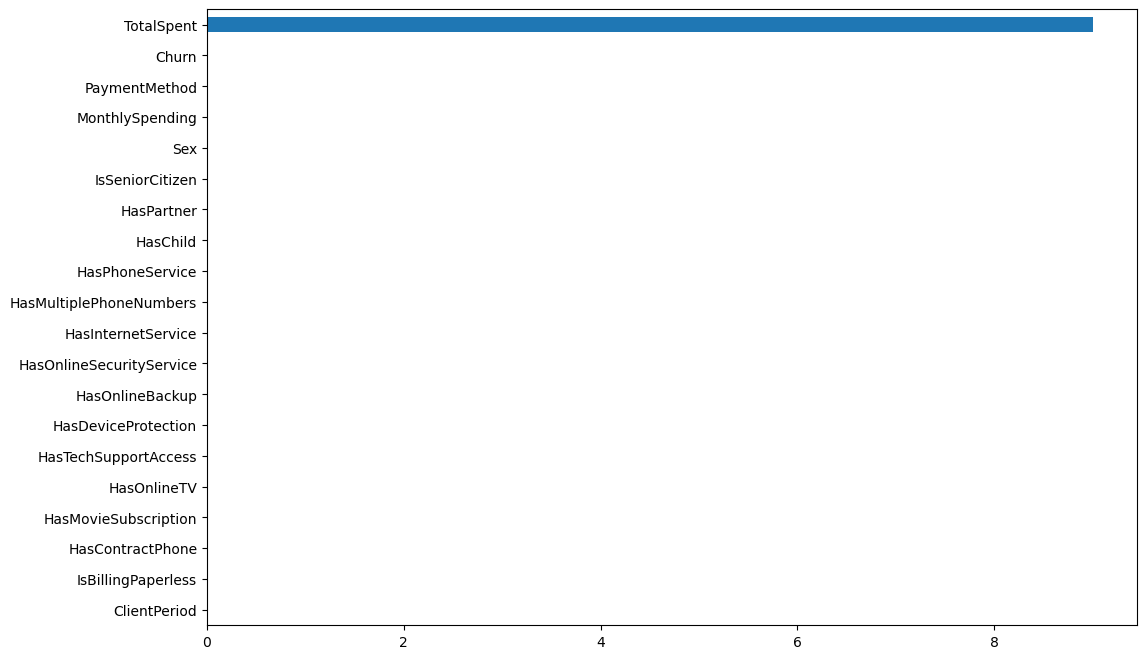

In [9]:
data.replace(" ", np.nan, inplace=True)
X_test.replace(" ", np.nan, inplace=True)
pd.DataFrame(data.isna().sum(), columns=["NaN Count"]) \
    .sort_values("NaN Count") \
    .plot(kind="barh", legend=False, figsize=(12, 8));

In [15]:
# в столбце тоталспент 9 нанов. Это новые клиенты которые еще не внесли платеж, логично будет заполнить их нулями
data.sort_values("TotalSpent").tail(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1157,11,94.20,999.9,Female,0,No,No,Yes,No,Fiber optic,No,Yes,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,0
1048,0,25.75,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,NaN,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,NaN,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,NaN,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,NaN,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [16]:
data["TotalSpent"] = data.TotalSpent.fillna(0).astype(float)
X_test["TotalSpent"] = X_test.TotalSpent.fillna(0).astype(float)

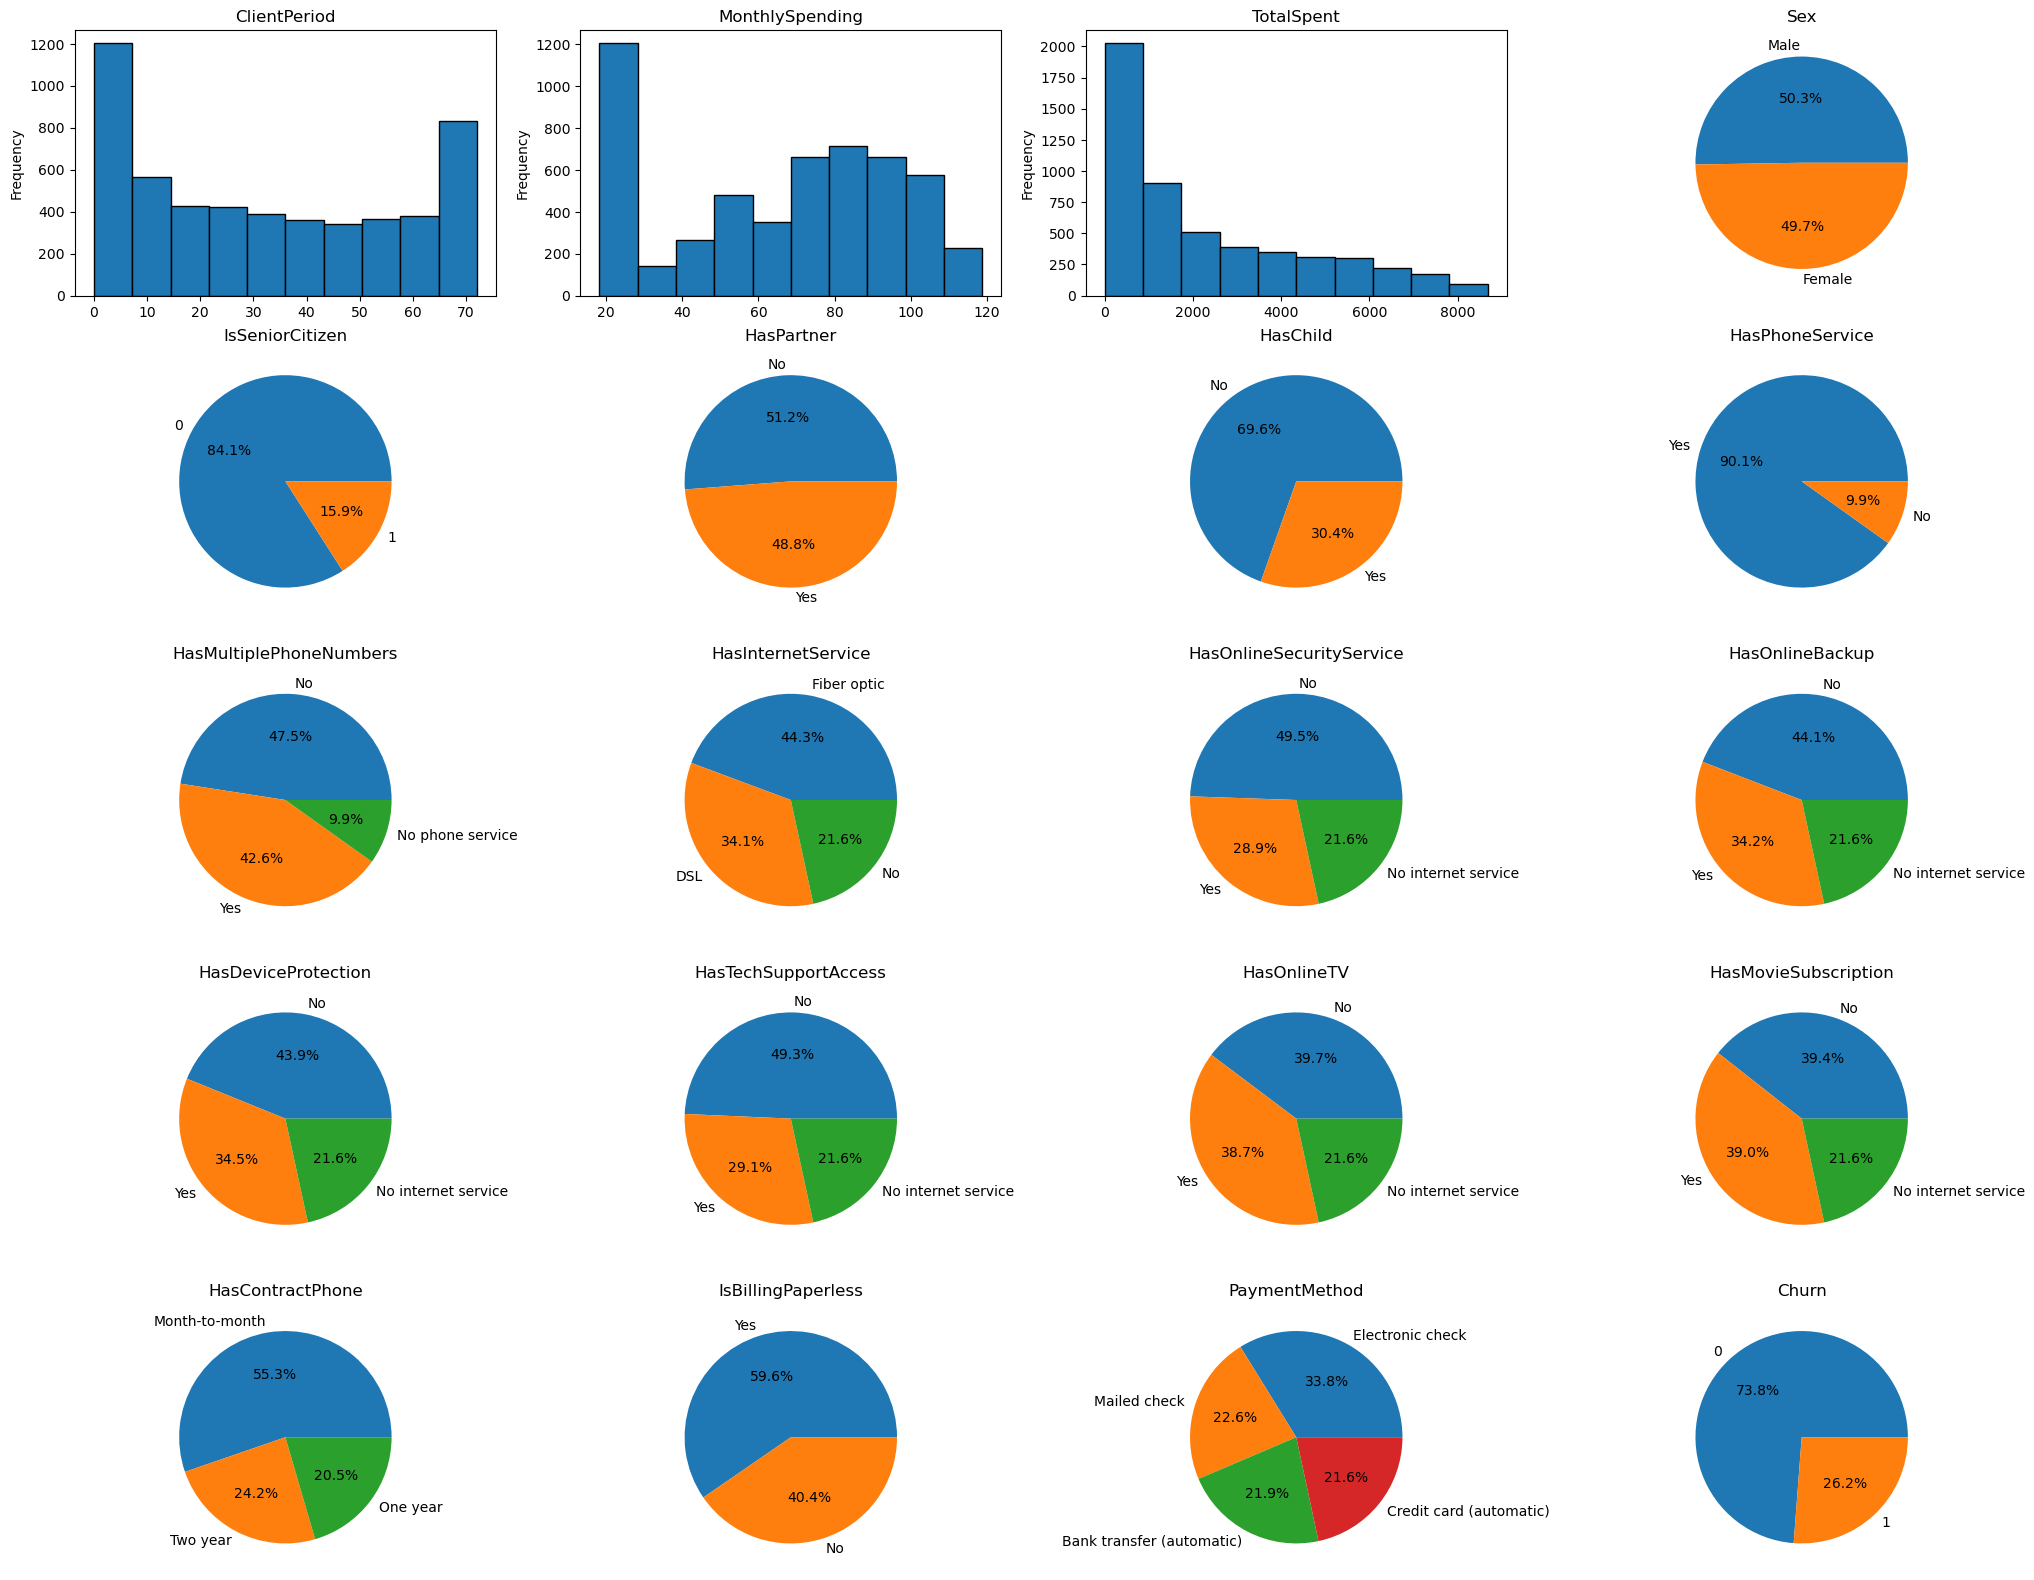

In [18]:
fig, axes = plt.subplots(5, 4, figsize=(25, 20))
for ax, col in zip(axes.flatten(), data.columns):
    ax.set_title(col)
    if col in cat_cols or col == target_col:
        ax.pie(data[col].value_counts(), autopct="%1.1f%%", labels=data[col].value_counts().index)
    else:
        data[col].plot(kind="hist", ec="black", ax=ax)

In [20]:
# Многие столбцы имеют значения «Нет интернета» и «Нет телефонной связи». 
# Поскольку у нас уже есть функции «HasPhoneService» и «HasInternetService», эта информация избыточна. 
# Мы можем объединить их с опцией «Нет».

# Столбец PaymentMethod содержит значения «Почтовый чек», «Электронный чек», «Банковский перевод (автоматический)» 
# и «Кредитная карта (автоматический)». Я думаю, единственное, что здесь имеет значение, это то, 
# производится ли платеж автоматически или нет.
# Давайте посмотрим на корреляцию с целевой переменной:
tmp = data.groupby("PaymentMethod", as_index=False).agg({"Churn": ["sum", "count"]})
tmp["Churn (%)"] = 100 * tmp["Churn", "sum"] / tmp["Churn", "count"]
tmp.sort_values("Churn (%)").reset_index(drop=True)

PaymentMethod Churn        Churn (%)
                               sum count           
0    Credit card (automatic)   165  1143  14.435696
1  Bank transfer (automatic)   195  1159  16.824849
2               Mailed check   230  1194  19.262982
3           Electronic check   794  1786  44.456887

In [21]:
# разница между электронным чеком и другими способами оплаты гораздо больше, чем между автоматическим и неавтоматическим.

# Теперь давайте проверим корреляцию между наличием телефона и целью:

tmp = data.groupby("HasContractPhone", as_index=False).agg({"Churn": ["sum", "count"]})
tmp["Churn (%)"] = 100 * tmp["Churn", "sum"] / tmp["Churn", "count"]
tmp.sort_values("Churn (%)").reset_index(drop=True)

HasContractPhone Churn        Churn (%)
                     sum count           
0         Two year    33  1280   2.578125
1         One year   120  1082  11.090573
2   Month-to-month  1231  2920  42.157534

In [22]:
# Видно что, люди с долгосрочными телефонными контрактами неохотно расторгают их.

tmp = data.groupby("HasInternetService", as_index=False).agg({"Churn": ["sum", "count"]})
tmp["Churn (%)"] = 100 * tmp["Churn", "sum"] / tmp["Churn", "count"]
tmp.sort_values("Churn (%)").reset_index(drop=True)

HasInternetService Churn        Churn (%)
                       sum count           
0                 No    82  1141   7.186678
1                DSL   342  1800  19.000000
2        Fiber optic   960  2341  41.008116

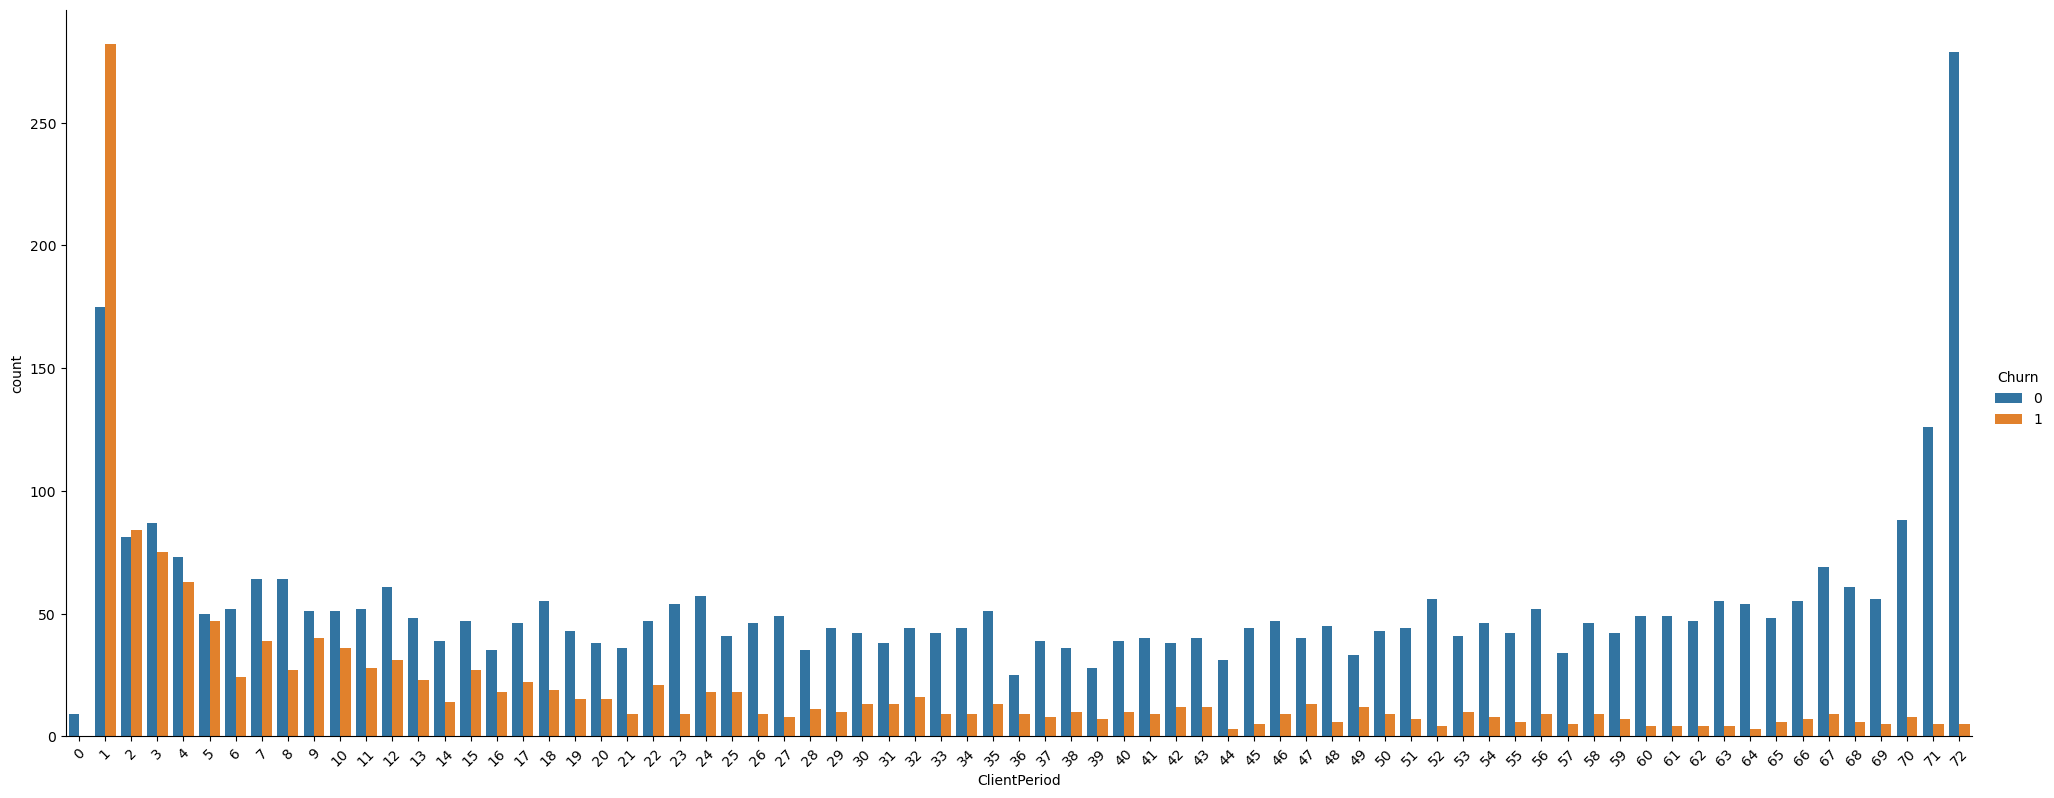

In [24]:
#Люди с оптикой чаще недовольны услугами провайдера, чем пользователи DSL.

# Теперь посмотрим, как лояльность зависит от СlientPeriod: 
import seaborn as sns
sns.catplot(data=data, x="ClientPeriod", hue="Churn", kind="count", height=8, aspect=20/8)
plt.xticks(rotation=45);

In [43]:
# Новые пользователи более склонны к оттоку с пиком в первый месяц. Постоянные клиенты остаются верны привычкам.

# Преобразуем категориальные признаки в тип int согласно наблюдениям. т.е. значения «Нет интернета» и «Нет телефонной связи» 
# получают тот же номер, что и «Нет» - 0. Значения в «PaymentMethod» и «HadContractPhone» будут пронумерованы в соответствии 
# с их корреляцией с целью. Двоичным значениям будут присвоены 0 и 1.

patterns = {
    "No": 0,
    "No internet service": 0,
    "No phone service": 0,
    "Yes": 1,
    "Male": 0,
    "Female": 1,
    "DSL": 1,
    "Fiber optic": 2,
    "Month-to-month": 0,
    "One year": 1,
    "Two year": 2,
    "Credit card (automatic)": 0,
    "Bank transfer (automatic)": 1,
    "Mailed check": 2,
    "Electronic check": 3,
}
X_train = data.replace(patterns).drop(target_col, axis=1)
y_train = data[target_col]
X_test = X_test.replace(patterns)

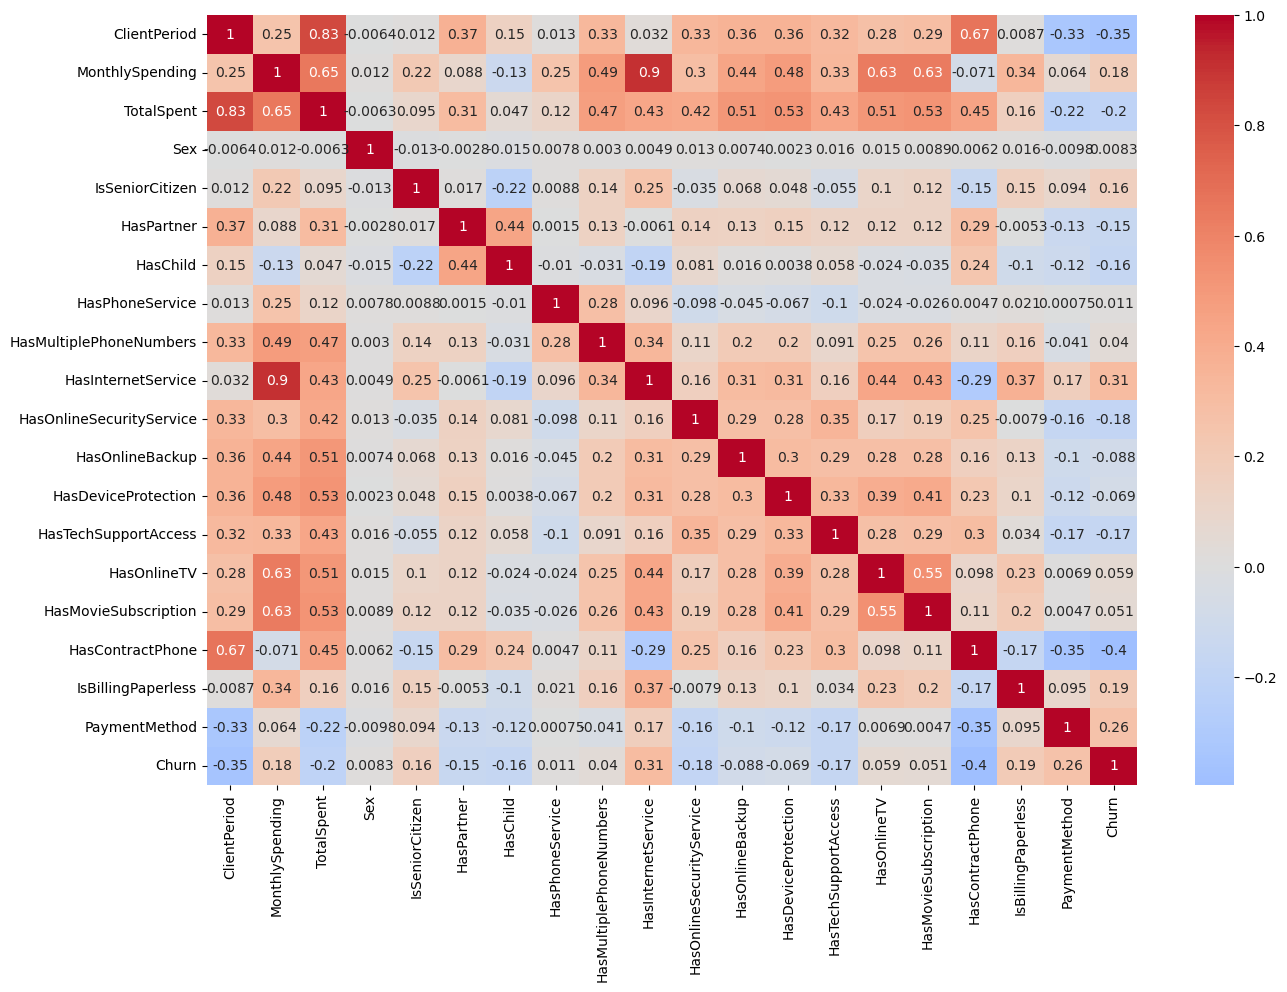

In [44]:
# нарисуем correlation heatmap (корреляционную тепловую карту).

sns.heatmap(data=pd.concat([X_train, y_train], axis=1).corr(),
            annot=True,
            cmap="coolwarm",
            center=0,
            ax=plt.subplots(figsize=(15,10))[1]);

In [ ]:
# HasContractPhone имеет самую сильную корреляцию с целью (-0,4), затем идет ClientPeriod (-0,35) и HasInternetService (0,31). 
# В первых двух случаях корреляция отрицательна. В последнем положительно. Заманчиво думать, что за эти годы провайдер 
# приобрел очень лояльных пользователей телефонов, а затем решил выйти на интернет-рынок и не так хорошо справился...

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [ ]:
# YOUR CODE

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [45]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [46]:
from sklearn.compose import ColumnTransformer
# params = {
#     "model__C": [1.734],  # np.arange(0.001, 100, 0.001)
# }
param_grid = {
    'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet'],
    'logisticregression__max_iter': np.linspace(100, 300, 5)
}
data_norm = ColumnTransformer([
        ('num_cols', StandardScaler(), num_cols),
        ('cat_cols', OneHotEncoder(), cat_cols)
    ])
pline = make_pipeline(data_norm, LogisticRegression())
# clf = Pipeline(steps=[
#     ("scaler", StandardScaler()),
#     ("model", LogisticRegression(penalty="l1", solver="saga", max_iter=1000, random_state=42)),
# ])
grid_search = GridSearchCV(
    estimator = pline,
    param_grid = param_grid,
    scoring="roc_auc",
    n_jobs=-1,
    cv=10,
    refit=True,
)
logreg = grid_search.fit(X_train, y_train)

C:\Users\Bulat\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
600 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Bulat\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Bulat\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Bulat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalt

In [47]:
print(f"best score: {logreg.best_score_}")
print(f"best params: {logreg.best_params_}")

best score: 0.8449748357893888
best params: {'logisticregression__C': 10, 'logisticregression__max_iter': 150.0, 'logisticregression__penalty': 'l2'}


In [48]:
submission = pd.read_csv('./submission.csv')
submission["Churn"] = logreg.predict_proba(X_test)[:, 1]
submission.to_csv(OUTPUT_DIR + "logreg.csv", index=False)

In [49]:
from catboost import CatBoostClassifier
catboost = CatBoostClassifier(
    cat_features=cat_cols,
    logging_level="Silent",
    eval_metric="AUC:hints=skip_train~false",
    grow_policy="Lossguide",
    metric_period=1000,
    random_seed=0,
)

PARAMS = {
    "n_estimators": [250],  # [5, 10, 20, 30, 40, 50, 70, 100, 150, 200, 250, 300, 500, 1000],
    "learning_rate": [0.05],  # [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.04, 0.05, 0.1, 0.2, 0.3, 0.5],
    "max_depth": [4],  # np.arange(4, 20, 1),
    "l2_leaf_reg": [10],  # np.arange(0.1, 1, 0.05),
    "subsample": [0.6],  # [3, 5, 7, 10],
    "random_strength": [5],  # [1, 2, 5, 10, 20, 50, 100],
    "min_data_in_leaf": [100],  # np.arange(10, 1001, 10),
}
catboost.grid_search(PARAMS, X_train, y_train, cv=5, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 0.8681264	best: 0.8681264 (0)	total: 3.69s	remaining: 0us
Estimating final quality...


{'params': {'min_data_in_leaf': 100,
  'random_strength': 5,
  'depth': 4,
  'l2_leaf_reg': 10,
  'iterations': 250,
  'subsample': 0.6,
  'learning_rate': 0.05},
 'cv_results': defaultdict(list,
             {'iterations': [0, 249],
              'test-AUC-mean': [0.6738448428910353, 0.848150440977052],
              'test-AUC-std': [0.03568219871124697, 0.01491232030260835],
              'train-AUC-mean': [0.674286151981913, 0.8662277514836992],
              'train-AUC-std': [0.045687735616764, 0.0030760473170784734],
              'test-Logloss-mean': [0.6746293084649804, 0.41027763916805615],
              'test-Logloss-std': [0.0012264681423689151,
               0.017607616411752475],
              'train-Logloss-mean': [0.6745106344821561, 0.38913850934181715],
              'train-Logloss-std': [0.0015597023202042711,
               0.004197658216176103]})}

In [52]:
print("Best score:", end=' ')
print(catboost.best_score_)
best_params = catboost.get_params()
for f in ("cat_features", "logging_level", "eval_metric"):
    best_params.pop(f)
print("Best params:", end=' ')
print(best_params)

Best score: {'learn': {'Logloss': 0.3914427123544701, 'AUC': 0.8642032782485164}}
Best params: {'random_seed': 0, 'metric_period': 1000, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 100, 'random_strength': 5, 'depth': 4, 'l2_leaf_reg': 10, 'iterations': 250, 'subsample': 0.6, 'learning_rate': 0.05}


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [38]:
pip install catboost

     ---------------------------------------- 74.0/74.0 MB 7.7 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [39]:
import catboost
from sklearn.metrics import roc_auc_score

In [40]:
X = data.drop(target_col, axis=1)
y = data[target_col]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=17)

In [41]:
cb_ini = catboost.CatBoostClassifier(cat_features=cat_cols, verbose=False)
cb_ini.fit(X_train, y_train);

In [42]:
probs = cb_ini.predict_proba(X_valid)[:,-1]
roc_auc_score(y_valid, probs)

0.8531937617041199

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [ ]:
best_model = # какая-то предыдущая модель

SyntaxError: invalid syntax (<ipython-input-12-7d881febecc7>, line 1)

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = # best_model.predict_proba(X_test) / best_model.predict(X_test)
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.